In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import pickle
import librosa as lr
import librosa.display
from glob import glob
import IPython
from IPython.display import Audio
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [7]:
audio_recording = 'Top_50_songs/Data/genres_original/pop/pop.000007.wav'
data, sr = librosa.load(audio_recording)
print(type(data), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [8]:
librosa.load(audio_recording, sr=45600)

(array([ 0.        ,  0.        ,  0.        , ..., -0.95777744,
        -1.0352569 , -0.9645911 ], dtype=float32),
 45600)

In [9]:
IPython.display.Audio(data, rate=sr)

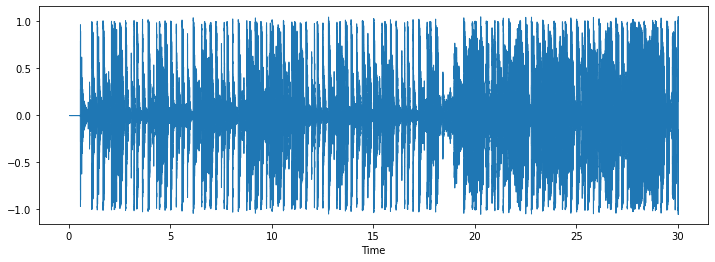

In [10]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(data)
plt.show()

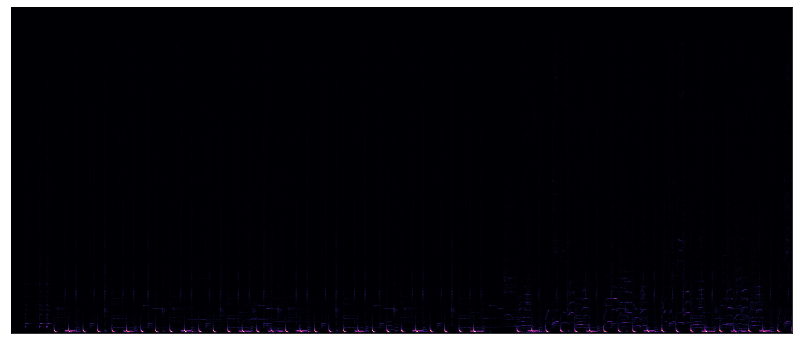

In [14]:
# create spectrogram of songs
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft)

In [ ]:
# feature extraction on top 50 songs
